# Import libraries

In [541]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from statannot import add_stat_annotation

# Load the data

In this project we analyzed the dataset about last 120 years olympic champions.   
The dataset splitted to some files with tables. 

### Task 1

In [542]:
def unite_table(direct, extension):
    one_table = pd.DataFrame()
    file_names = os.listdir(direct)
    
    for file in file_names:
        try:
            if file.endswith(extension) and extension == 'csv':
                adding_table = pd.read_csv(os.path.join(direct, file))
                one_table = pd.concat([one_table, adding_table], axis=0)
            elif file.endswith(extension) and extension != 'csv':
                adding_table = pd.read_table(os.path.join(direct, file))
                one_table = pd.concat([one_table, adding_table], axis=0)
        except:
            pass
    
    return one_table

In [543]:
direct = '/Users/emulciber/IB/statistics_and_r/BI_stats_2022/project_1/data/athlete_events/'
extension = 'csv'

In [544]:
olympics = unite_table(direct, extension)

# Exploratory data analysis (EDA)

The dataset has the following features:

* ID – Unique number for each athlete
* Name – Athlete's name
* Sex – M or F
* Age – Integer
* Height – In centimeters
* Weight – In kilograms
* Team – Team name
* NOC – National Olympic Committee 3-letter code
* Games – Year and season
* Year – Integer
* Season – Summer or Winter
* City – Host city
* Sport – Sport
* Event – Event
* Medal – Gold, Silver, Bronze, or NA

### Task 2

Check that the table is loaded correct. See the data in table format visually.

In [545]:
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Men's 10 kilometres Sprint,NaN
1,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Mixed 2 x 6 kilometres and 2 x 7.5 ki...,NaN
2,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Men's 20 kilometres,NaN
3,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Men's 4 x 7.5 kilometres Relay,NaN
4,91139,Dmitry Anatolyevich Pantov,M,24.0,190.0,85.0,Kazakhstan,KAZ,1994 Winter,1994.0,Winter,Lillehammer,Biathlon,Biathlon Men's 10 kilometres Sprint,NaN


Call types and number of objects in table.

In [546]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271115 entries, 0 to 22390
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271115 non-null  int64  
 1   Name    271114 non-null  object 
 2   Sex     271113 non-null  object 
 3   Age     261639 non-null  float64
 4   Height  210943 non-null  float64
 5   Weight  208239 non-null  float64
 6   Team    271112 non-null  object 
 7   NOC     271111 non-null  object 
 8   Games   271110 non-null  object 
 9   Year    271108 non-null  float64
 10  Season  271108 non-null  object 
 11  City    271108 non-null  object 
 12  Sport   271108 non-null  object 
 13  Event   271107 non-null  object 
 14  Medal   39782 non-null   object 
dtypes: float64(4), int64(1), object(10)
memory usage: 33.1+ MB


All types are correct and correspond to the data description (integer and numbers as float, another variables as object). But some variables contain missing values.

To solve what to do with missing values, we need to estimate each variable: how many missing value a variable contains? Is it numeric variable or strings? Is a variable more important to get some groups from dataset or it isn't?   
    
* Variables "Sex", "Games", "Season" and "Medal" contain simple categories, so these variables are important for us and we can delete rows with missing values in these variables (except "Medal" because of NaN as type of needed value). Then we need to check if values of categories are incorrect.   
    
* Variables "Age", "Height", "Weight" and "Year" contain numeric values, so we may delete rows with NaN, fill NaNs with means of variables or do nothing. Because of having about 60k missing values in these variables and the need to count numbers of values we want to save the maximum of possible values, so we'll do nothing with NaN values and try to do our analysis with NaNs processing individually. But we must check values if they are legit and they aren't outliers out of logic of the variable.   
    
* Variables "ID", "Name", "Team", "NOC", "City", "Sport" and "Event" contain unique values or categories with many values so NaN values in these variables is no problem for us.

Before all changes check the number of observations:

In [547]:
obs_before_na_editing = len(olympics)
obs_before_na_editing

271115

Drop NaN values from some variables:

In [548]:
olympics = olympics.dropna(subset=['Sex', 'Games', 'Season'])

Check if "Sex" variable contains invalid values:

In [549]:
olympics['Sex'].value_counts()

M    196586
F     74520
G         2
Name: Sex, dtype: int64

We see the "G" value. Let's see on it:

In [550]:
olympics[olympics['Sex'] == 'G']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
42,79609,Pavel Mike,G,22.0,182.0,79.0,Czechoslovakia,TCH,1972 Summer,1972.0,Summer,Munich,Handball,Handball Men's Handball,Silver
74,79630,Anatoly Mikhaylin,G,37.0,NaN,NaN,Russia,RUS,1996 Summer,1996.0,Summer,Atlanta,Sailing,Sailing Mixed Two Person Keelboat,NaN


From the context we see that the needed values is "M" so change it:

In [551]:
olympics.loc[olympics['Sex'] == 'G', 'Sex'] = 'M' 

Check if "Games" variable contains invalid values:

In [552]:
olympics['Games'].value_counts()

2000 Summer    13820
1996 Summer    13779
2016 Summer    13688
2008 Summer    13602
2004 Summer    13441
1992 Summer    12977
2012 Summer    12919
1988 Summer    12037
1972 Summer    10304
1984 Summer     9453
1976 Summer     8641
1968 Summer     8588
1952 Summer     8270
1960 Summer     8118
1964 Summer     7702
1980 Summer     7191
1936 Summer     6506
1948 Summer     6405
1924 Summer     5233
1956 Summer     5127
1928 Summer     4992
2014 Winter     4891
2010 Winter     4402
2006 Winter     4382
1920 Summer     4292
2002 Winter     4109
1912 Summer     4039
1998 Winter     3605
1992 Winter     3436
1994 Winter     3160
1908 Summer     3101
1932 Summer     2969
1988 Winter     2639
1984 Winter     2134
1900 Summer     1936
1968 Winter     1891
1976 Winter     1861
1964 Winter     1778
1980 Winter     1746
1906 Summer     1733
1972 Winter     1655
1956 Winter     1307
1904 Summer     1301
1960 Winter     1116
1952 Winter     1088
1948 Winter     1075
1936 Winter      895
1928 Winter  

All values are correct.
     
Check if "Season" variable contains invalid values:

In [553]:
olympics['Season'].value_counts()

Summer    222544
Winter     48564
Name: Season, dtype: int64

All values are correct.

Check if "Medal" variable contains invalid values:

In [554]:
olympics['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13115
Name: Medal, dtype: int64

All values are correct.

Check how many observations we have after NaN editing:

In [555]:
obs_after_na_editing = len(olympics)
print(obs_after_na_editing)
print(obs_before_na_editing - obs_after_na_editing)

271108
7


So we lost only 7 observations.

Now we can see the first descriptive statistics of our numeric variables:

In [556]:
olympics.describe()

,ID,Age,Height,Weight,Year
count,271108.000000,261634.000000,210939.000000,208235.000000,271108.000000
mean,68249.031718,25.557710,175.339885,70.702744,1978.378314
std,39022.238707,6.407331,10.524642,14.348223,29.877579
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.000000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,240.000000,340.000000,214.000000,2016.000000


All statistics make sense in the context of the meaning of the variables.   

Now we need to check values and outliers in "Age", "Height", "Weight" and "Year". Some questions may arise to the min value "25" in "Weight", max values "240" in "Age", "340" in "Height" and "214" in "Weight" so let's see on it:

In [557]:
olympics[olympics['Weight'] == 25]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
18013,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980.0,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,NaN
18014,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980.0,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,NaN
18015,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980.0,Summer,Moskva,Gymnastics,Gymnastics Women's Floor Exercise,NaN
18016,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980.0,Summer,Moskva,Gymnastics,Gymnastics Women's Horse Vault,NaN
18017,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980.0,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,NaN
18018,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980.0,Summer,Moskva,Gymnastics,Gymnastics Women's Balance Beam,NaN


We see that the value is correct.

In [558]:
olympics[olympics['Age'] == 240]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
38,23459,Flicien Jules mile Courbet,M,240.0,NaN,NaN,Belgium,BEL,1912 Summer,1912.0,Summer,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,NaN


We don't know what is the true value so fill it with mean:

In [559]:
olympics.loc[olympics['Age'] == 240, 'Age'] = olympics['Age'].mean()

Check the distribution:

<AxesSubplot: >

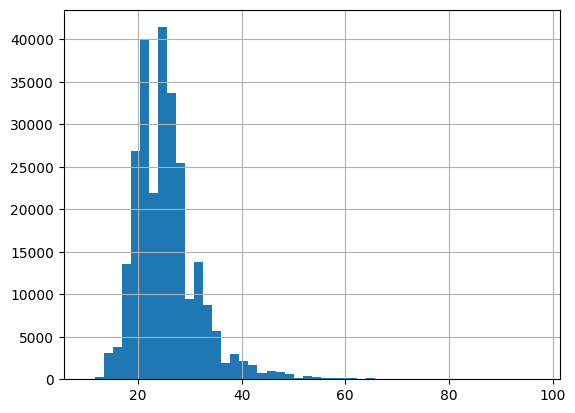

In [560]:
olympics['Age'].hist(bins=50)

Now it seems legit.

In [561]:
olympics[olympics['Height'] == 340]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
227,23549,Kirsty Leigh Coventry (-Seward),F,28.0,340.0,64.0,Zimbabwe,ZIM,2012 Summer,2012.0,Summer,London,Swimming,Swimming Women's 200 metres Individual Medley,NaN


There we also don't know what is the true value so fill it with mean:

In [562]:
olympics.loc[olympics['Height'] == 340, 'Height'] = olympics['Height'].mean()

Check the distribution:

<AxesSubplot: >

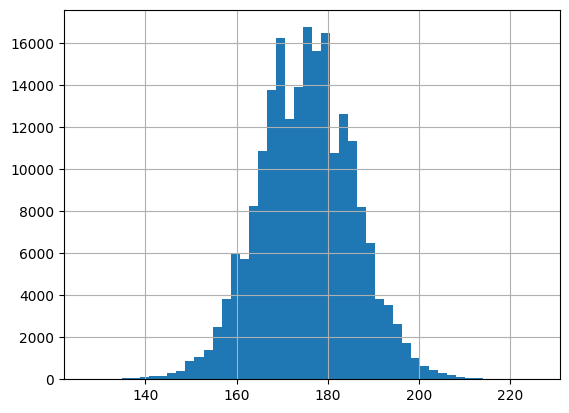

In [563]:
olympics['Height'].hist(bins=50)

Now it is seems similarly to normal distribution, so check the next variable.

In [564]:
olympics[olympics['Weight'] == 214]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
319,12177,"Ricardo Blas, Jr.",M,21.0,183.0,214.0,Guam,GUM,2008 Summer,2008.0,Summer,Beijing,Judo,Judo Men's Heavyweight,NaN
320,12177,"Ricardo Blas, Jr.",M,25.0,183.0,214.0,Guam,GUM,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Heavyweight,NaN


<AxesSubplot: >

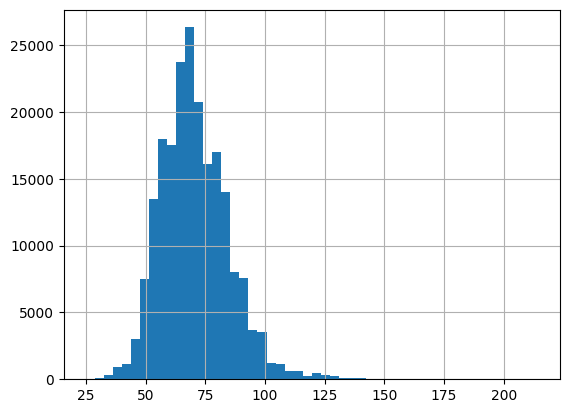

In [565]:
olympics['Weight'].hist(bins=50)

Looks like it is real data about weight.

Let's see on descriptive statistics one more time:

In [566]:
olympics.describe()

,ID,Age,Height,Weight,Year
count,271108.000000,261634.000000,210939.000000,208235.000000,271108.000000
mean,68249.031718,25.556891,175.339104,70.702744,1978.378314
std,39022.238707,6.393601,10.518534,14.348223,29.877579
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.000000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


Now it looks great.

# Main tasks

### Task 3

In [567]:
youngest_fem_1992 = min(olympics[(olympics['Year'] == 1992) & (olympics['Sex'] == 'F')]['Age'])
print('Age of youngest female athlete in 1992:', youngest_fem_1992)

Age of youngest female athlete in 1992: 12.0


In [568]:
youngest_male_1992 = min(olympics[(olympics['Year'] == 1992) & (olympics['Sex'] == 'M')]['Age'])
print('Age of youngest male athlete in 1992:', youngest_male_1992)

Age of youngest male athlete in 1992: 11.0


### Task 4

In [569]:
mean_height_fem = olympics[olympics['Sex'] == 'F']['Height'].mean()
std_height_fem = olympics[olympics['Sex'] == 'F']['Height'].std()

print(f'Mean of "Height" for female: {mean_height_fem}', 
      f'Std of "Height" for female: {std_height_fem}', sep='\n')

Mean of "Height" for female: 167.8398144722897
Std of "Height" for female: 8.77859349987673


In [570]:
mean_height_male = olympics[olympics['Sex'] == 'M']['Height'].mean()
std_height_male = olympics[olympics['Sex'] == 'M']['Height'].std()

print(f'Mean of "Height" for male: {mean_height_male}', 
      f'Std of "Height" for male: {std_height_male}', sep='\n')

Mean of "Height" for male: 178.85861956075033
Std of "Height" for male: 9.360377299680854


### Task 5

In [571]:
mean_height_tennis_fem_2000 = olympics[(olympics['Sex'] == 'F') & \
                                       (olympics['Sport'] == 'Tennis') & \
                                       (olympics['Year'] == 2000)]['Height'].mean().round(1)

std_height_tennis_fem_2000 = olympics[(olympics['Sex'] == 'F') & \
                                      (olympics['Sport'] == 'Tennis') & \
                                      (olympics['Year'] == 2000)]['Height'].std().round(1)

print(f'Mean of Height for tennis female athletes in 2000: {mean_height_tennis_fem_2000}', \
     f'Std of Height for tennis female athletes in 2000: {std_height_tennis_fem_2000}', sep='\n')

Mean of Height for tennis female athletes in 2000: 171.8
Std of Height for tennis female athletes in 2000: 6.5


### Task 6

In [572]:
weight_max_2006 = olympics[(olympics['Year'] == 2006)]['Weight'].max()

sporttype_high_weight_athlete_2006 = olympics[(olympics['Year'] == 2006) & \
                                              (olympics['Weight'] == weight_max_2006)]['Sport'].values[0]

print('The sport in which the heaviest athlete competed at the 2006 Olympics:', sporttype_high_weight_athlete_2006)

The sport in which the heaviest athlete competed at the 2006 Olympics: Skeleton


### Task 7

In [573]:
gold_female_1980_2010 = len(olympics[(olympics['Year'] >= 1980) & \
                                     (olympics['Year'] <= 2010) & \
                                     (olympics['Sex'] == 'F') & \
                                     (olympics['Medal'] == 'Gold')])

print('Number of gold medals won by women from 1980 to 2010:', gold_female_1980_2010)

Number of gold medals won by women from 1980 to 2010: 2249


### Task 8

In [574]:
john_aalberg_years = len(olympics[olympics['Name'] == 'John Aalberg']['Year'].unique())

print('Athlete John Aalberg participated in the Olympic Games in different years:', john_aalberg_years)

Athlete John Aalberg participated in the Olympic Games in different years: 2


### Task 9

In [575]:
olympics_2008 = olympics[olympics['Year'] == 2008]

Due to the difference between the boundaries given in the task and how they are defined by python, we will set the appropriate boundaries for selecting groups and non-included boundaries in the description.

In [576]:
cut_labels = ['15-24', '25-34', '35-44', '45-55']
cut_bins = [14, 24, 34, 44, 55]

<AxesSubplot: >

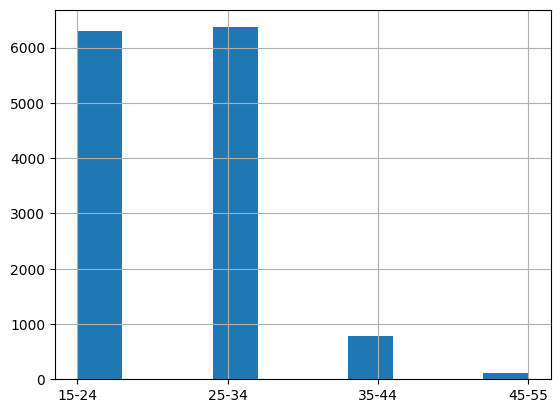

In [577]:
pd.cut(olympics_2008['Age'], bins=cut_bins, labels=cut_labels).hist()

The least and most represented (by number of participants) age groups of athletes at the 2008 Olympics:

The most represented: \[15-25), \[25-35)     
The least represented: \[35-45), \[45-55]

### Task 10

In [578]:
sporttypes_2002_1994 = len(olympics[olympics['Year'] == 2002]['Sport'].unique()) - len(olympics[olympics['Year'] == 1994]['Sport'].unique())

print('The number of sports in the 2002 Olympics has changed compared to the 1994 Olympics on:', sporttypes_2002_1994)

The number of sports in the 2002 Olympics has changed compared to the 1994 Olympics on: 3


### Task 11

In [579]:
winter = olympics[olympics['Season'] == 'Winter']
summer = olympics[olympics['Season'] == 'Summer']

In [580]:
winter_group = winter.groupby('Medal')['Team'].value_counts().to_frame()
summer_group = summer.groupby('Medal')['Team'].value_counts().to_frame()

In [581]:
winter_group

Team
Medal  Team                
Bronze Finland          215
       Sweden           177
       Norway           127
       United States    121
       Austria           97
...                     ...
Silver Slovakia           2
       Unified Team-2     2
       New Zealand        1
       North Korea        1
       Ukraine            1

[188 rows x 1 columns]

In [582]:
winter_group.loc['Bronze'].head(3)

,Team
Team,
Finland,215
Sweden,177
Norway,127


In [583]:
winter_group.loc['Silver'].head(3)

,Team
Team,
United States,271
Canada,189
Norway,165


In [584]:
winter_group.loc['Gold'].head(3)

,Team
Team,
Canada,289
Soviet Union,228
Norway,151


In [585]:
summer_group.loc['Bronze'].head(3)

,Team
Team,
United States,1112
Germany,610
Soviet Union,596


In [586]:
summer_group.loc['Silver'].head(3)

,Team
Team,
United States,1241
Soviet Union,635
Great Britain,576


In [587]:
summer_group.loc['Gold'].head(3)

,Team
Team,
United States,2333
Soviet Union,830
Germany,564


### Task 12

"Height" z-scores normalization:

In [588]:
height_mean = olympics['Height'].mean()
height_std = olympics['Height'].std()
Height_z_scores = olympics['Height'].apply(lambda x: (x - height_mean) / height_std)

In [589]:
Height_z_scores

0        1.108605
1        1.108605
2        1.108605
3        1.108605
4        1.393816
           ...   
22386    0.348042
22387    0.062832
22388    0.062832
22389    0.918464
22390    0.918464
Name: Height, Length: 271108, dtype: float64

### Task 13

"Height" min-max normalization:

In [590]:
height_min = olympics['Height'].min()
height_max = olympics['Height'].max()

In [591]:
Height_min_max_scaled = olympics['Height'].apply(lambda x: (x - height_min) / (height_max - height_min))

In [592]:
Height_min_max_scaled

0        0.606061
1        0.606061
2        0.606061
3        0.606061
4        0.636364
           ...   
22386    0.525253
22387    0.494949
22388    0.494949
22389    0.585859
22390    0.585859
Name: Height, Length: 271108, dtype: float64

### Task 14

Comparing height, weight and age of male and female participated in winter olympic games.

#### Height:

In [593]:
winter_male = winter[winter['Sex'] == 'M']
winter_female = winter[winter['Sex'] == 'F']

We need to compare two independent groups. To choose the test we need to check our variables for normal distribution:

In [594]:
shapiro_winter_male_height = st.shapiro(winter_male['Height'])
shapiro_winter_female_height = st.shapiro(winter_female['Height'])

print('Shapiro test for normal distribution:', \
      f'Male height statistic: {round(shapiro_winter_male_height[0], 3)} with p-value = {round(shapiro_winter_male_height[1], 3)}', \
      f'Female height statistic: {round(shapiro_winter_female_height[0], 3)} with p-value = {round(shapiro_winter_female_height[1], 3)}', \
      sep='\n')

Shapiro test for normal distribution:
Male height statistic: nan with p-value = 1.0
Female height statistic: nan with p-value = 1.0


/opt/homebrew/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


And for equal variances:

In [595]:
levene_winter_height = st.levene(winter_male['Height'], winter_female['Height'])

print('Levene\'s test for equality of variances:', \
      f'W = {round(levene_winter_height[0], 3)} with p-value = {round(levene_winter_height[1], 3)}', \
      sep='\n')

Levene's test for equality of variances:
W = nan with p-value = nan


Samples haven't normal distributions and equal variances so we can't use t-test for independent samples.   
Then we need to use something like Mann-Whitney test:

In [596]:
mw_winter_height = st.mannwhitneyu(winter_male['Height'], winter_female['Height'])

print('Mann-Whithney test:', \
     f'U = {round(mw_winter_height[0], 3)} with p-value = {round(mw_winter_height[1], 3)}', sep='\n')

Mann-Whithney test:
U = nan with p-value = nan


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

M v.s. F: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=3.296e+08


(<AxesSubplot: xlabel='Sex', ylabel='Height (in cm)'>,
 [<statannot.StatResult.StatResult at 0x2c4b0ba30>])

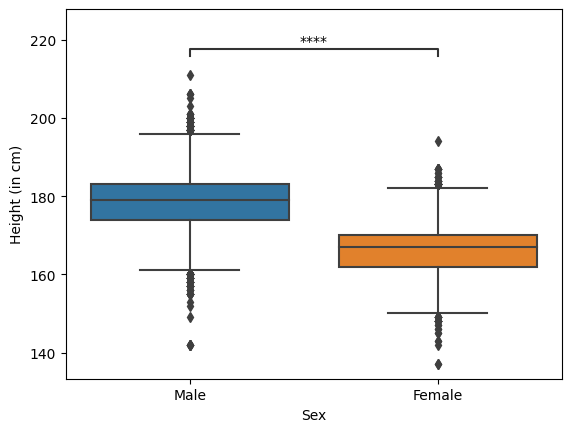

In [597]:
winter_height_fig = sns.boxplot(winter, x = 'Sex', y = 'Height')
winter_height_fig.set_ylabel('Height (in cm)')
winter_height_fig.set_xticklabels(['Male', 'Female'])

add_stat_annotation(winter_height_fig, data=winter, x='Sex', y='Height',
                    box_pairs=[("M", "F")],
                    test='Mann-Whitney', text_format='star', loc='inside')

P-value < 0.05, so the difference in height between male and female athletes on winter olympics is statistically significant.

#### Weight:

Check for normal distribution and equality of variances:

In [598]:
shapiro_winter_male_weight = st.shapiro(winter_male['Weight'])
shapiro_winter_female_weight = st.shapiro(winter_female['Weight'])

print('Shapiro test for normal distribution:', \
      f'Male weight statistic: {round(shapiro_winter_male_weight[0], 3)} with p-value = {round(shapiro_winter_male_weight[1], 3)}', \
      f'Female weight statistic: {round(shapiro_winter_female_weight[0], 3)} with p-value = {round(shapiro_winter_female_weight[1], 3)}', \
      sep='\n')

Shapiro test for normal distribution:
Male weight statistic: nan with p-value = 1.0
Female weight statistic: nan with p-value = 1.0


/opt/homebrew/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [599]:
levene_winter_weight = st.levene(winter_male['Weight'], winter_female['Weight'])

print('Levene\'s test for equality of variances:', \
      f'W = {round(levene_winter_weight[0], 3)} with p-value = {round(levene_winter_weight[1], 3)}', \
      sep='\n')

Levene's test for equality of variances:
W = nan with p-value = nan


Samples haven't normal distributions and equal variances so we can't use t-test for independent samples.
Then we need to use something like Mann-Whitney test:

In [600]:
mw_winter_weight = st.mannwhitneyu(winter_male['Weight'], winter_female['Weight'])

print('Mann-Whithney test:', \
     f'U = {round(mw_winter_weight[0], 3)} with p-value = {round(mw_winter_weight[1], 3)}', sep='\n')

Mann-Whithney test:
U = nan with p-value = nan


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

M v.s. F: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=3.199e+08


(<AxesSubplot: xlabel='Sex', ylabel='Weight (in kg)'>,
 [<statannot.StatResult.StatResult at 0x2c4ae4430>])

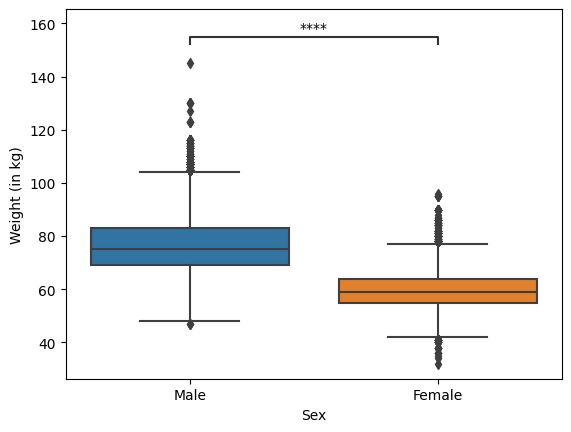

In [601]:
winter_weight_fig = sns.boxplot(winter, x = 'Sex', y = 'Weight')
winter_weight_fig.set_ylabel('Weight (in kg)')
winter_weight_fig.set_xticklabels(['Male', 'Female'])

add_stat_annotation(winter_weight_fig, data=winter, x='Sex', y='Weight',
                    box_pairs=[("M", "F")],
                    test='Mann-Whitney', text_format='star', loc='inside')

P-value < 0.05, so the difference in weight between male and female athletes on winter olympics is statistically significant.

#### Age

Check for normal distribution and equality of variances:

In [602]:
shapiro_winter_male_age = st.shapiro(winter_male['Age'])
shapiro_winter_female_age = st.shapiro(winter_female['Age'])

print('Shapiro test for normal distribution:', \
      f'Male age statistic: {round(shapiro_winter_male_age[0], 3)} with p-value = {round(shapiro_winter_male_age[1], 3)}', \
      f'Female age statistic: {round(shapiro_winter_female_age[0], 3)} with p-value = {round(shapiro_winter_female_age[1], 3)}', \
      sep='\n')

Shapiro test for normal distribution:
Male age statistic: nan with p-value = 1.0
Female age statistic: nan with p-value = 1.0


/opt/homebrew/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [603]:
levene_winter_age = st.levene(winter_male['Age'], winter_female['Age'])

print('Levene\'s test for equality of variances:', \
      f'W = {round(levene_winter_age[0], 3)} with p-value = {round(levene_winter_age[1], 3)}', \
      sep='\n')

Levene's test for equality of variances:
W = nan with p-value = nan


Samples haven't normal distributions and equal variances so we can't use t-test for independent samples.
Then we need to use something like Mann-Whitney test:

In [604]:
mw_winter_age = st.mannwhitneyu(winter_male['Age'], winter_female['Age'])

print('Mann-Whithney test:', \
     f'U = {round(mw_winter_age[0], 3)} with p-value = {round(mw_winter_age[1], 3)}', sep='\n')

Mann-Whithney test:
U = nan with p-value = nan


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

M v.s. F: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.031e-214 U_stat=2.945e+08


(<AxesSubplot: xlabel='Sex', ylabel='Age (in years)'>,
 [<statannot.StatResult.StatResult at 0x2c5370340>])

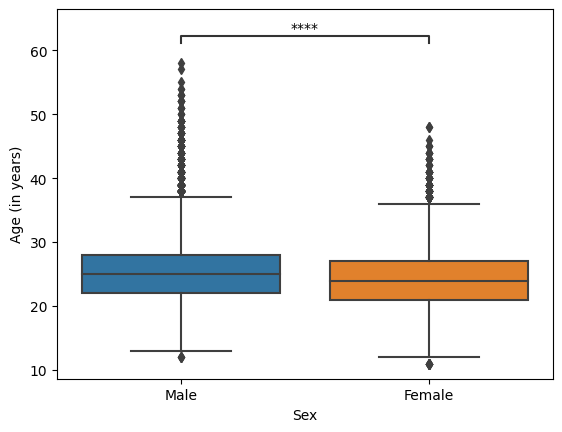

In [605]:
winter_age_fig = sns.boxplot(winter, x = 'Sex', y = 'Age')
winter_age_fig.set_ylabel('Age (in years)')
winter_age_fig.set_xticklabels(['Male', 'Female'])

add_stat_annotation(winter_age_fig, data=winter, x='Sex', y='Age',
                    box_pairs=[("M", "F")],
                    test='Mann-Whitney', text_format='star', loc='inside')

P-value < 0.05, so the difference in age between male and female athletes on winter olympics is statistically significant.

### Task 15

In [607]:
team_medal = olympics.groupby('Medal')['Team'].value_counts().reset_index('Medal')
team_medal.columns = ['Medal', 'Count']
team_medal = team_medal.reset_index('Team')

In [608]:
team_medal = pd.pivot(team_medal, index='Team', columns = ['Medal'], values = 'Count')

In [609]:
team_medal

Medal,Bronze,Gold,Silver
Team,,,
A North American Team,4.0,NaN,NaN
Afghanistan,2.0,NaN,NaN
Algeria,8.0,5.0,4.0
Ali-Baba II,5.0,NaN,NaN
Amateur Athletic Association,NaN,5.0,NaN
...,...,...,...
Winnipeg Shamrocks-1,NaN,12.0,NaN
Yugoslavia,93.0,130.0,167.0
Zambia,1.0,NaN,1.0


In [ ]:
# to be continued....

# Additional task

### Task 16

#### Correlation between height and weight separately for male and female athletes

At first we need to check distributions of our data to choose correlation coefficient.

In [610]:
olympics_male = olympics[olympics['Sex'] == 'M'].dropna(subset=['Height', 'Weight'])
olympics_female = olympics[olympics['Sex'] == 'F'].dropna(subset=['Height', 'Weight'])

In [611]:
shapiro_male_height = st.shapiro(olympics_male['Height'])
shapiro_female_height = st.shapiro(olympics_female['Height'])

shapiro_male_weight = st.shapiro(olympics_male['Weight'])
shapiro_female_weight = st.shapiro(olympics_female['Weight'])

print('Shapiro tests for normal distribution:', \
     f'Male height statistic: {round(shapiro_male_height[0], 3)} with p-value = {round(shapiro_male_height[1], 3)}', \
     f'Female height statistic: {round(shapiro_female_height[0], 3)} with p-value = {round(shapiro_female_height[1], 3)}', \
     f'Male weight statistic: {round(shapiro_male_weight[0], 3)} with p-value = {round(shapiro_male_weight[1], 3)}', \
     f'Female weight statistic: {round(shapiro_female_weight[0], 3)} with p-value = {round(shapiro_female_weight[1], 3)}', \
     sep='\n')

Shapiro tests for normal distribution:
Male height statistic: 0.997 with p-value = 0.0
Female height statistic: 0.996 with p-value = 0.0
Male weight statistic: 0.955 with p-value = 0.0
Female weight statistic: 0.956 with p-value = 0.0


/opt/homebrew/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Variables are not match with normal distribution (p-value < 0.05) so we can use Spearman's correlations:

In [612]:
male_hw_corr = st.spearmanr(olympics_male['Height'], olympics_male['Weight'])
female_hw_corr = st.spearmanr(olympics_female['Height'], olympics_female['Weight'])

print('Spearman\'s correlations between height and weight for male and female athletes:', \
     f'Male R: {round(male_hw_corr[0], 3)} with p-value = {round(male_hw_corr[1], 3)}', \
     f'Female R: {round(female_hw_corr[0], 3)} with p-value = {round(female_hw_corr[1], 3)}', \
     sep='\n')

Spearman's correlations between height and weight for male and female athletes:
Male R: 0.764 with p-value = 0.0
Female R: 0.753 with p-value = 0.0


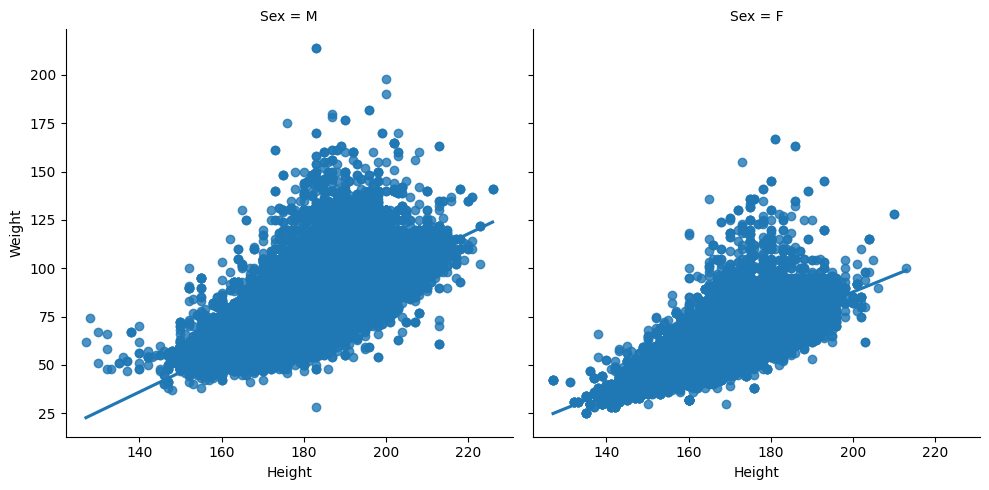

In [613]:
sns.lmplot(olympics, x = 'Height', y = 'Weight', col = 'Sex')

We see the strong correlation that is statistically significant (p < 0.05) between weight and height for both male and female athletes.

#### How did the number of medals received by the USSR and Russia change over time?

In [614]:
olympics_russia = olympics[olympics['Team'].isin(['Soviet Union', 'Russia'])]

In [615]:
olympics_russia = olympics_russia.groupby(['Season', 'Year'])['Medal'].value_counts().reset_index(['Season', 'Year'])
olympics_russia.columns = ['Season', 'Year', 'Count']
olympics_russia = olympics_russia.reset_index('Medal')
olympics_russia

,Medal,Season,Year,Count
0,Silver,Summer,1908.0,2
1,Gold,Summer,1908.0,1
2,Silver,Summer,1912.0,5
3,Bronze,Summer,1912.0,2
4,Silver,Summer,1952.0,62
...,...,...,...,...
89,Gold,Winter,2010.0,6
90,Silver,Winter,2010.0,5
91,Gold,Winter,2014.0,25
92,Silver,Winter,2014.0,20


/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


[None,
 None,
 None,
 [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None]]

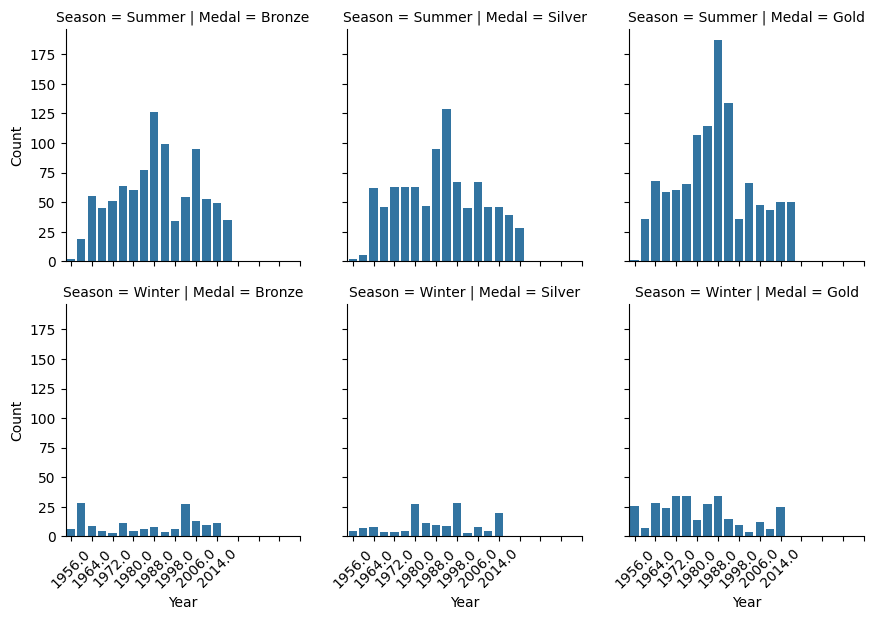

In [616]:
olympics_russia_fig = sns.FacetGrid(olympics_russia, row = 'Season', col = 'Medal', col_order=['Bronze', 'Silver', 'Gold'])
olympics_russia_fig.map(sns.barplot, 'Year', 'Count')
plt.xticks(range(0, len(olympics_russia['Year'].unique()), 2))
[plt.setp(ax.get_xticklabels(), rotation=45) for ax in olympics_russia_fig.axes.flat]

We see that summer games was more success for Russia than winter games. Also we see the rise in the number of medals received in 1980th. 